Ова скрипта се користи за цртање функције густине дводимензионалног скупа података.

In [191]:
shape = "noisy_jinjang"
n_samples = 5000
outliers_fraction = 0.05

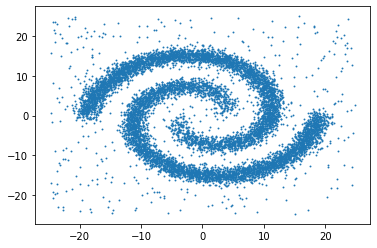

In [192]:
%run generate_2d.ipynb

In [193]:
reduced = x

In [194]:
reduced.T

array([[ 14.12169899, -10.5942228 ,   8.07827095, ...,  -6.95130515,
         20.86567877,  22.51186769],
       [-10.77638513,  -7.04664661, -16.89752192, ..., -20.42089633,
        -18.15906845,  -2.69971135]])

In [195]:
nbins=100
x,y = reduced.T
u,v = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]

In [196]:
u

array([[-24.74692081, -24.74692081, -24.74692081, ..., -24.74692081,
        -24.74692081, -24.74692081],
       [-24.24612523, -24.24612523, -24.24612523, ..., -24.24612523,
        -24.24612523, -24.24612523],
       [-23.74532964, -23.74532964, -23.74532964, ..., -23.74532964,
        -23.74532964, -23.74532964],
       ...,
       [ 23.83025069,  23.83025069,  23.83025069, ...,  23.83025069,
         23.83025069,  23.83025069],
       [ 24.33104627,  24.33104627,  24.33104627, ...,  24.33104627,
         24.33104627,  24.33104627],
       [ 24.83184185,  24.83184185,  24.83184185, ...,  24.83184185,
         24.83184185,  24.83184185]])

In [197]:
len(u)

100

In [203]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(bandwidth=2)
kde.fit(reduced)

KernelDensity(bandwidth=2)

In [199]:
#val = kde(reduced.T)(np.vstack([u.flatten(), v.flatten()]))

In [204]:
logprob = kde.score_samples(reduced)
val = np.exp(logprob)

In [205]:
val

array([1.39101521e-03, 1.19923488e-03, 6.87360532e-04, ...,
       3.62871324e-05, 1.27062920e-05, 2.09223195e-04])

In [206]:
len(val)

10000

([], [])

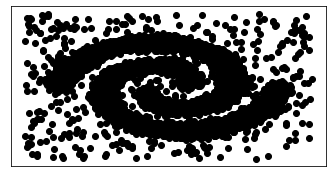

In [207]:
plt.figure(figsize=(18, 10))
fig = gds.GridSpec(3, 6)
plt.subplot(fig[0,0:2])
#plt.title('Облак тачака')
plt.plot(x, y, 'ko')
plt.xticks([])
plt.yticks([])

<ipython-input-208-d3e63f5e0fba>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(u, v, val.reshape(u.shape), cmap=plt.cm.BuGn_r)


([], [])

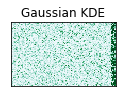

In [208]:
plt.subplot(fig[0,2:4])
plt.title('Gaussian KDE')
plt.pcolormesh(u, v, val.reshape(u.shape), cmap=plt.cm.BuGn_r)
plt.xticks([])
plt.yticks([])

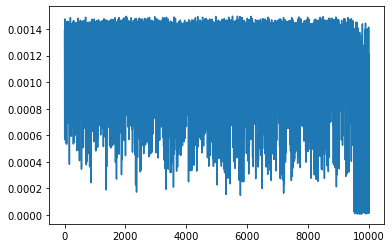

In [209]:
plt.plot(val)

In [221]:
val_colors = np.digitize(val, bins = [0.0002, 0.0006, 0.0008])
val_colors

array([3, 3, 2, ..., 0, 0, 1], dtype=int64)

In [222]:
np.unique(val_colors)

array([0, 1, 2, 3], dtype=int64)

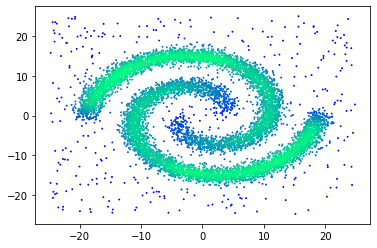

In [224]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=val, cmap = 'winter', s= 0.8)

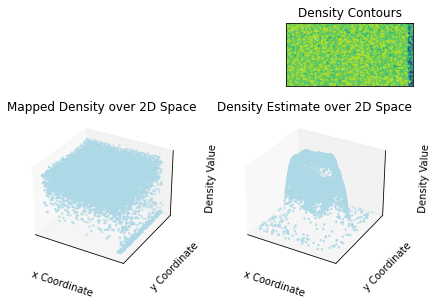

In [225]:
        plt.subplot(fig[0,4:6])
        plt.title('Density Contours')
        plt.pcolormesh(u, v, val.reshape(u.shape), cmap=plt.cm.BuGn_r, shading='gouraud')
        plt.contour(u, v, val.reshape(u.shape))
        plt.xticks([])
        plt.yticks([])

        ax0 = plt.subplot(fig[1:3,0:3], projection='3d')
        ax0.set_title('Mapped Density over 2D Space')
        ax0.set_xticks([])                               
        ax0.set_yticks([])                               
        ax0.set_zticks([])
        ax0.scatter(u, v, val, s=2, c='lightblue')
        ax0.set_xlabel('x Coordinate')
        ax0.set_ylabel('y Coordinate')
        ax0.set_zlabel('Density Value')

        ax1 = plt.subplot(fig[1:3,3:6], projection='3d')
        ax1.set_title('Density Estimate over 2D Space')
        ax1.set_xticks([])                               
        ax1.set_yticks([])                               
        ax1.set_zticks([])
        ax1.scatter(x, y, val, s=2, c='lightblue')
        ax1.set_xlabel('x Coordinate')
        ax1.set_ylabel('y Coordinate')
        ax1.set_zlabel('Density Value')

        plt.tight_layout()
        plt.show()

<IPython.core.display.Javascript object>


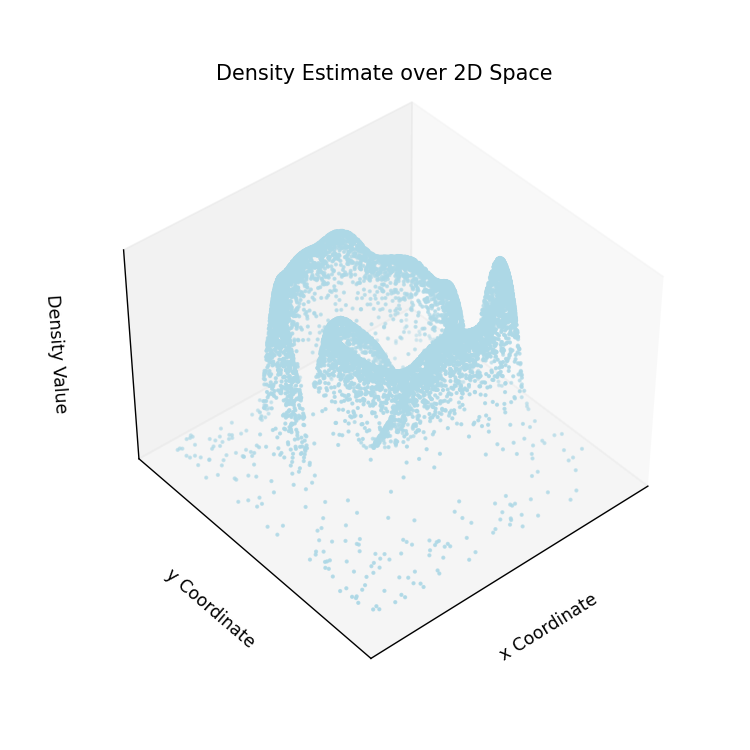

In [236]:
%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax1 = plt.axes(projection='3d')
ax1.set_title('Density Estimate over 2D Space')
ax1.set_xticks([])                               
ax1.set_yticks([])                               
ax1.set_zticks([])
ax1.scatter(x, y, val, s=2, c='lightblue')
ax1.set_xlabel('x Coordinate')
ax1.set_ylabel('y Coordinate')
ax1.set_zlabel('Density Value')
plt.show()